In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score

from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier

import graphviz
from sklearn.tree import export_graphviz
from yellowbrick.classifier import ConfusionMatrix #criar matriz de forma gráfica

In [2]:
credito = pd.read_csv('Credit.csv')
credito.shape

(1000, 21)

In [3]:
#fotmato de matriz
previsores = credito.iloc[:, 0:20].values
classe = credito.iloc[:,20].values
previsores

array([['<0', 6, "'critical/other existing credit'", ..., 1, 'yes',
        'yes'],
       ['0<=X<200', 48, "'existing paid'", ..., 1, 'none', 'yes'],
       ["'no checking'", 12, "'critical/other existing credit'", ..., 2,
        'none', 'yes'],
       ...,
       ["'no checking'", 12, "'existing paid'", ..., 1, 'none', 'yes'],
       ['<0', 45, "'existing paid'", ..., 1, 'yes', 'yes'],
       ['0<=X<200', 45, "'critical/other existing credit'", ..., 1,
        'none', 'yes']], dtype=object)

In [4]:
labelencoder = LabelEncoder()
previsores[:,0] = labelencoder.fit_transform(previsores[:,0])
previsores[:,2] = labelencoder.fit_transform(previsores[:,2])
previsores[:, 3] = labelencoder.fit_transform(previsores[:, 3])
previsores[:, 5] = labelencoder.fit_transform(previsores[:, 5])
previsores[:, 6] = labelencoder.fit_transform(previsores[:, 6])
previsores[:, 8] = labelencoder.fit_transform(previsores[:, 8])
previsores[:, 9] = labelencoder.fit_transform(previsores[:, 9])
previsores[:, 11] = labelencoder.fit_transform(previsores[:, 11])
previsores[:, 13] = labelencoder.fit_transform(previsores[:, 13])
previsores[:, 14] = labelencoder.fit_transform(previsores[:, 14])
previsores[:, 16] = labelencoder.fit_transform(previsores[:, 16])
previsores[:, 18] = labelencoder.fit_transform(previsores[:, 18])
previsores[:, 19] = labelencoder.fit_transform(previsores[:, 19])

In [5]:
#divisão da base de dados entre treinamento e teste (30% para testar e 70% para treinar)
X_train, X_test, Y_train, Y_test = train_test_split(previsores,
                                                    classe,
                                                    test_size=0.3,
                                                    random_state=1)

X_test

array([[1, 15, 0, ..., 2, 1, 1],
       [2, 36, 3, ..., 1, 0, 1],
       [0, 12, 4, ..., 1, 0, 1],
       ...,
       [1, 15, 1, ..., 1, 1, 1],
       [1, 24, 3, ..., 1, 0, 1],
       [1, 9, 1, ..., 2, 0, 1]], dtype=object)

In [6]:
svm = SVC()
svm.fit(X_train,Y_train)

SVC()

In [7]:
previsoes = svm.predict(X_test)
previsoes

array(['good', 'bad', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'bad', 'good', 'good',
       'bad', 'good', 'good', 'bad', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'bad', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'bad', 'good', 'good', 'good',
       'good

In [8]:
taxa_acerto = accuracy_score(Y_test, previsoes)
taxa_erro = 1 - taxa_acerto
taxa_acerto

0.7166666666666667

In [9]:
#GERAÇÃO DE MATRIZ DE CONFUSÃO e calculo de taxa de acerto/erro
confusao = confusion_matrix(Y_test, previsoes)
confusao

array([[  4,  82],
       [  3, 211]])

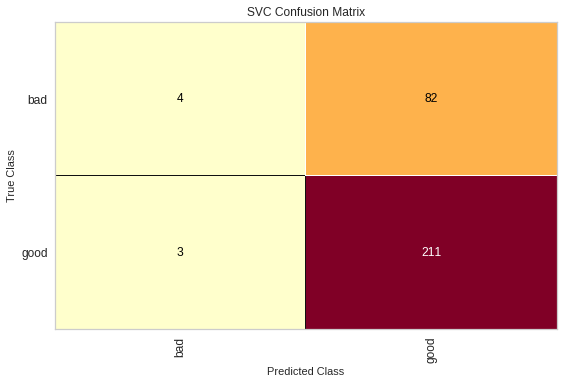

In [10]:
#visualização de matriz de confusão
v = ConfusionMatrix(SVC())
v.fit(X_train, Y_train)
v.score(X_test, Y_test)
v.poof()

In [11]:
#Utilização de algoritmo ExtraTreesClassifier para extrair as características mais importantes
forest = ExtraTreesClassifier()
forest.fit(X_train,Y_train)
importancias = forest.feature_importances_
importancias

array([0.10042797, 0.08037168, 0.0676323 , 0.05959282, 0.08165517,
       0.05313322, 0.05121528, 0.05522062, 0.04309345, 0.02586194,
       0.04976224, 0.0461856 , 0.06909869, 0.04282223, 0.0372136 ,
       0.03343513, 0.04221111, 0.02238736, 0.03185551, 0.00682407])

In [13]:
#Criar outro modelo com a base de dados reduzida, treinamento e obtenção das previsões e taxa de acerto 
svm2 = SVC()
svm2.fit(X_train2,Y_train)
previsoes2 = svm2.predict(X_test2)
taxa_acerto2 = accuracy_score(Y_test, previsoes2)
taxa_acerto2

0.7233333333333334

In [12]:
#Criação de dados utilizando somente os atributos mais importantes
X_train2 = X_train[:, [0,1,2,3]]
X_test2 = X_test[:,[0,1,2,3]]

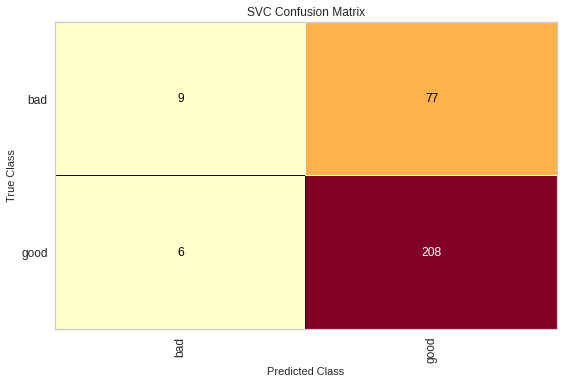

In [14]:
#visualização de matriz de confusão
v = ConfusionMatrix(SVC())
v.fit(X_train2, Y_train)
v.score(X_test2, Y_test)
v.poof()